데이터로 살펴보는 학생들의 행동연구를 통한 성적 예측 
----------

    
    
## 데이터 소개
    
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득



## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적


### 연구용 데이터의 인용


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'robin0309'
os.environ['KAGGLE_KEY'] = "39d5191a5de2cda257138f0285e9378e"

In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

xAPI-Edu-Data.zip: Skipping, found more recently modified local copy (use --force to force download)


unzip:  cannot find any matches for wildcard specification "'*.zip'".

No zipfiles found.


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!ls




'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [6]:
import glob

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [7]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('xAPI-Edu-Data.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [10]:
round(df.describe(),2)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.00,480.00,480.00,480.00
mean,46.78,54.80,37.92,43.28
std,30.78,33.08,26.61,27.64
min,0.00,0.00,0.00,1.00
25%,15.75,20.00,14.00,20.00
50%,50.00,65.00,33.00,39.00
75%,75.00,84.00,58.00,70.00
max,100.00,99.00,98.00,99.00


In [11]:
df.describe(include=[np.number])

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [12]:
df.describe(include=['O'])

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


### 문제 5. 수치형 데이터의 히스토그램 그리기


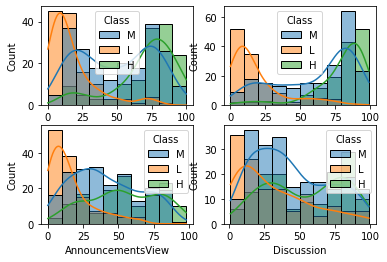

In [13]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

plt.subplot(221)
sns.histplot(x='raisedhands',hue='Class',data=df,kde=True)

plt.subplot(222)
sns.histplot(x='VisITedResources',hue='Class',data=df,kde=True)

plt.subplot(223)
sns.histplot(x='AnnouncementsView',hue='Class',data=df,kde=True)

plt.subplot(224)
sns.histplot(x='Discussion',hue='Class',data=df,kde=True)


plt.rcParams["figure.figsize"] = (20, 15)
plt.show()

### Groupby로 상관관계 파악 -> 성적이 높을 수록 손을 들거나 <br> 공지확인 및 토론 발표등의 횟수가 높아짐을 보임

In [14]:
df.groupby('Class').mean()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Class,,,,
H,70.288732,78.746479,53.380282,53.661972
L,16.889764,18.322835,15.574803,30.834646
M,48.938389,60.635071,40.962085,43.791469


In [15]:
df.groupby('Class').mean()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Class,,,,
H,70.288732,78.746479,53.380282,53.661972
L,16.889764,18.322835,15.574803,30.834646
M,48.938389,60.635071,40.962085,43.791469


In [16]:
def my_mean(s):
    return np.mean(s)

df.groupby('Class').agg({'raisedhands':my_mean,'VisITedResources':np.sum})

,raisedhands,VisITedResources
Class,,
H,70.288732,11182
L,16.889764,2327
M,48.938389,12794


In [17]:
df.groupby(['Class'],as_index=True).apply(lambda x:(x.raisedhands+x.VisITedResources).sum())

Class
H    21163
L     4472
M    23120
dtype: int64

### 성별은 남자가 여자보다 살짝 더 Class H 분포가 많다는 것을 알 수 있다

In [18]:
df.groupby(['Class','gender'],as_index=False).mean()  

,Class,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,H,F,70.040000,81.080000,52.106667,51.933333
1,H,M,70.567164,76.134328,54.805970,55.597015
2,L,F,19.208333,15.041667,13.583333,47.708333
3,L,M,16.349515,19.087379,16.038835,26.902913
4,M,F,46.539474,62.605263,35.815789,43.815789
5,M,M,50.288889,59.525926,43.859259,43.777778


In [19]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [20]:
df.groupby('gender').size()

gender
F    175
M    305
dtype: int64

In [21]:
df.loc[df['Class']=='H','Discussion']

10     80
14     60
19     99
30     70
47     90
       ..
459    83
464    90
465    92
466    58
467    60
Name: Discussion, Length: 142, dtype: int64

In [22]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


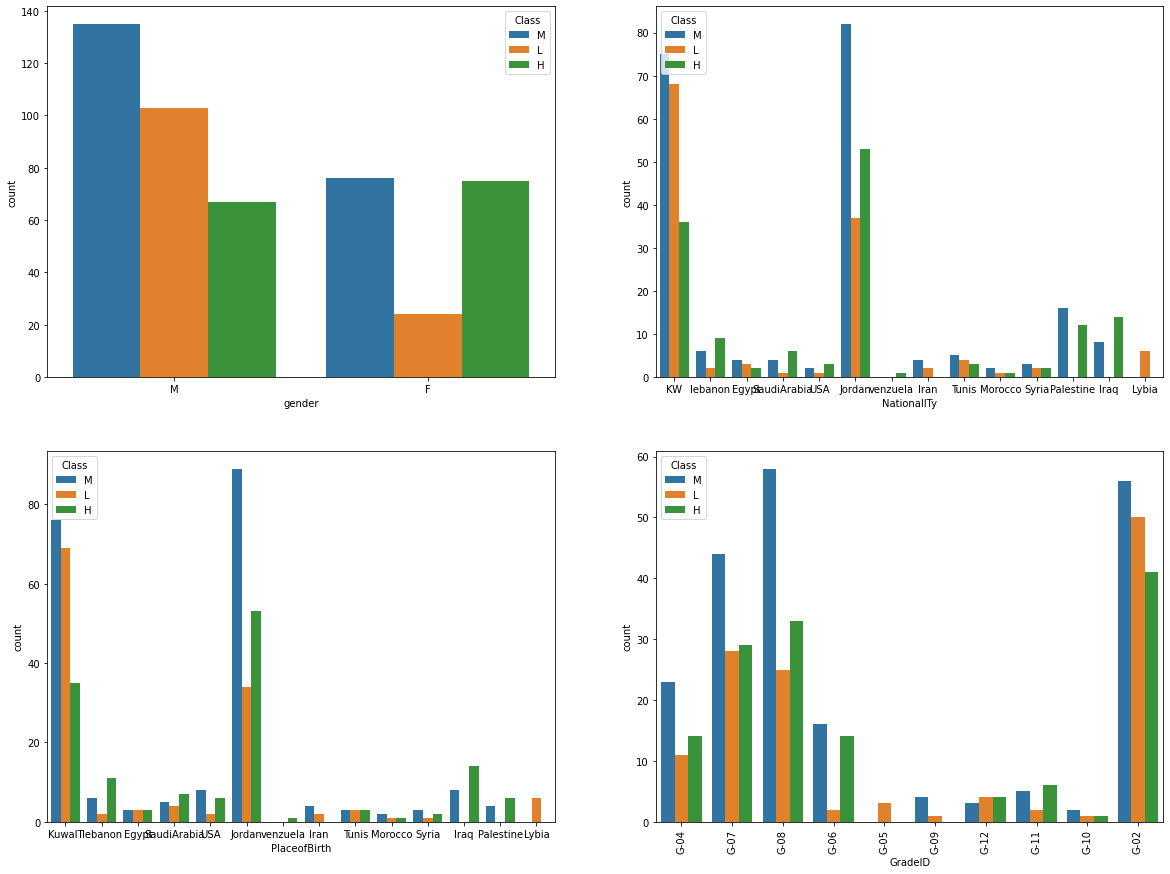

<Figure size 1440x720 with 0 Axes>

In [23]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인

plt.subplot(221)
sns.countplot(x='gender',hue='Class',data=df)

plt.subplot(222)
sns.countplot(x='NationalITy',hue='Class',data=df)

plt.subplot(223)
sns.countplot(x='PlaceofBirth',hue='Class',data=df)

plt.subplot(224)
sns.countplot(x='GradeID',hue='Class',data=df)
plt.rcParams["figure.figsize"] = (15, 15)
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))

plt.show()

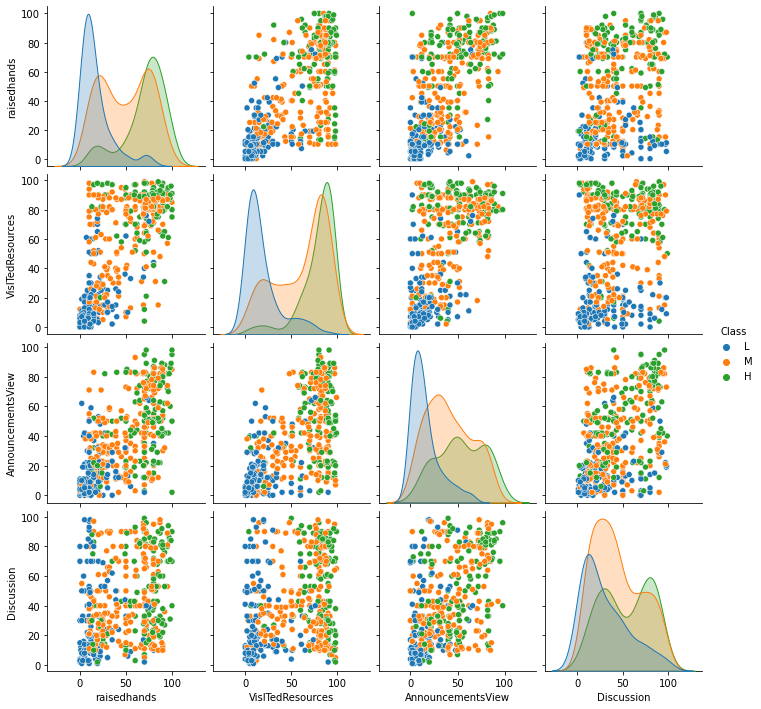

In [24]:
sns.pairplot(df, hue='Class', hue_order=['L', 'M', 'H'])

### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [25]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용

df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))

In [26]:
df['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [27]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
gb = df.groupby('gender').mean()['Class_value']
gb


gender
F    0.291429
M   -0.118033
Name: Class_value, dtype: float64

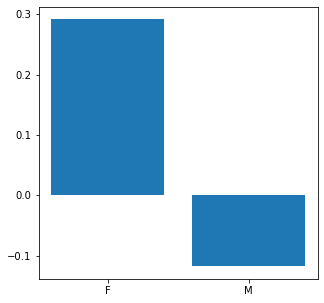

<Figure size 360x360 with 0 Axes>

In [33]:
plt.bar(gb.index,gb)
plt.rcParams["figure.figsize"] = (5, 5)
plt.figure(figsize=(5,5))
plt.show()

<BarContainer object of 12 artists>

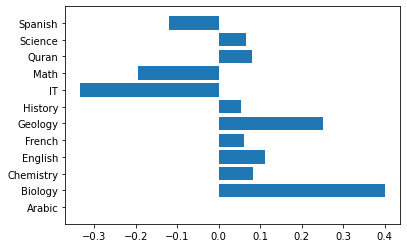

In [148]:
gb=df.groupby('Topic').mean()['Class_value']
plt.barh(gb.index,gb)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 8. get_dummies()를 이용하여 범주형 데이터 전처리하기


In [34]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [35]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
Class_value                  int64
dtype: object

In [160]:
df.select_dtypes(exclude='object')

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class_value
0,15,16,2,20,0
1,20,20,3,25,0
2,10,7,0,30,-1
3,30,25,5,35,-1
4,40,50,12,50,0
...,...,...,...,...,...
475,5,4,5,8,-1
476,50,77,14,28,0
477,55,74,25,29,0
478,30,17,14,57,-1


In [36]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [37]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                            'StageID', 'GradeID','SectionID', 'Topic',
                            'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                   drop_first=True)
y = df['Class']

In [45]:
X.shape

(480, 59)

In [46]:
X.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_M', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10',
       'GradeID_G-11', 'GradeID_G-12', 'SectionID_B', 'SectionID_C',
       'Topic_B

In [38]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### 문제 9. 학습데이터와 테스트데이터 분리하기


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [47]:
from sklearn.linear_model import LogisticRegression

In [54]:
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### 문제 11. 모델 학습 결과 평가하기


In [55]:
from sklearn.metrics import classification_report

In [58]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))




              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.79      0.79        33
           M       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



### 문제 12. XGBoost 모델 생성/학습하기


In [59]:
from xgboost import XGBClassifier

In [61]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)




C:\Users\Administrator\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 문제 13. 모델 학습 결과 평가하기


In [66]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.79      0.69      0.74        55
           L       0.85      0.85      0.85        33
           M       0.65      0.73      0.69        56

    accuracy                           0.74       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.75      0.74      0.74       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

In [85]:
model_lr.coef_.shape # 59가 학습에 쓰이는 feature 개수 3은 class

(3, 59)

In [89]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

### 성적이 좋은 요소 찾기

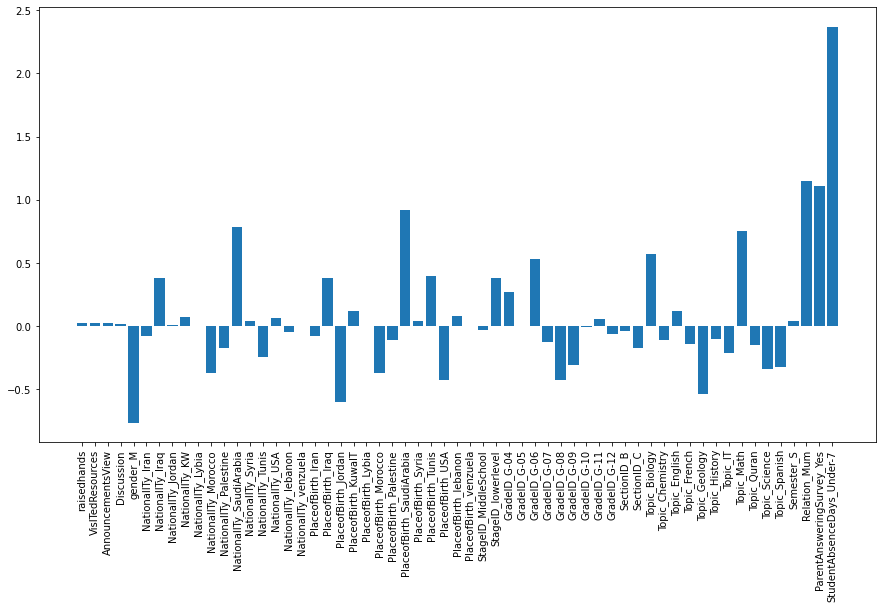

In [90]:
# Logistic Regression 모델의 coef_ 속성을 plot하기

fig=plt.figure(figsize=(15,8))
plt.bar(X.columns, model_lr.coef_[0, :])  # 성적을 좋게하는 것을 출력하기위해  [0,:] -> H 로 하는 것
plt.xticks(rotation=90)
plt.show()

### 성적이 좋지 않은 학생들의 요인 추출

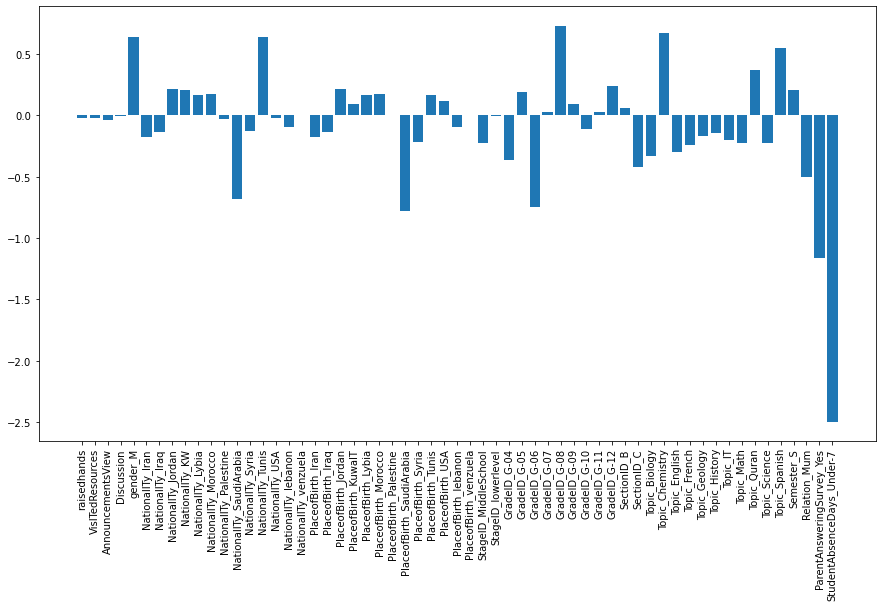

In [91]:
# Logistic Regression 모델의 coef_ 속성을 plot하기

fig=plt.figure(figsize=(15,8))
plt.bar(X.columns, model_lr.coef_[1, :])  # 성적을 좋게하는 것을 출력하기위해  [0,:] -> H 로 하는 것
plt.xticks(rotation=90)
plt.show()

### 문제 15. XGBoost 모델로 특징의 중요도 확인하기 <br>성적을 결정하는데 중요하게 생각되는 요소 -> 특정 L 이나 M이나 H가아닌 전체적인 경우

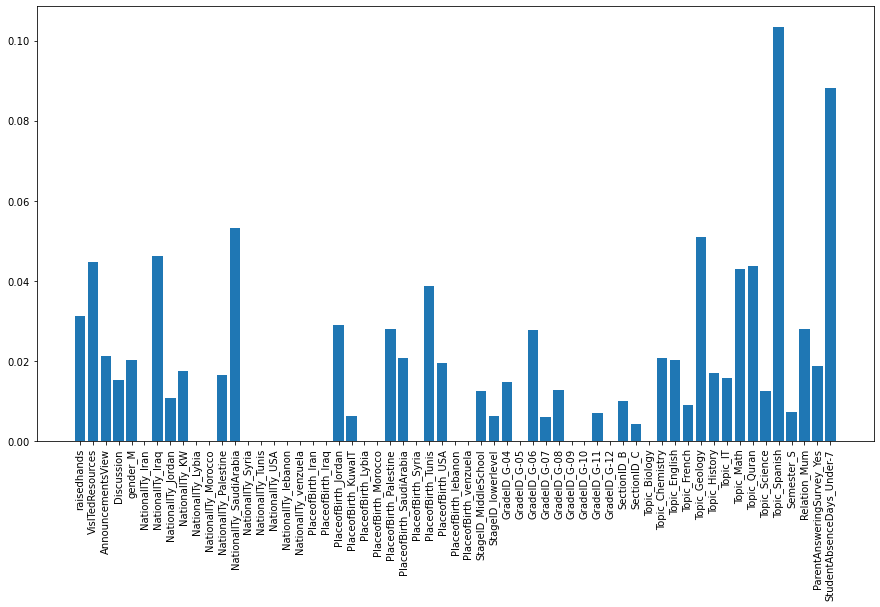

In [73]:
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()
